# Capítulo 5 – Transformada Discreta de Fourier

Neste capítulo, estudaremos a **Transformada Discreta de Fourier (DFT)** e seus fundamentos, propriedades e aplicações. A DFT é uma das ferramentas mais importantes no processamento de sinais digitais, pois permite analisar sinais no domínio da frequência a partir de dados no domínio do tempo.

## Objetivos do Capítulo

- Apresentar a **Série de Fourier Discreta (DFS)** para representar sinais periódicos.
- Relacionar a **amostragem no domínio-z** com o espectro de frequência.
- Definir a **Transformada Discreta de Fourier (DFT)** e entender sua computação.
- Explorar as principais **propriedades da DFT**, como simetria, periodicidade e convolução.
- Utilizar a DFT para realizar **convolução linear** de sinais.
- Introduzir o **algoritmo da FFT (Fast Fourier Transform)**, que permite uma implementação computacional eficiente da DFT.



## 5.1 – The Discrete Fourier Series (DFS)

A **Série de Fourier Discreta (DFS)** representa sinais **periódicos** no tempo discreto como uma soma de exponenciais complexas.

Seja $ x[n] $ um sinal **periódico com período $ N $**, ele pode ser representado por:

$$
x[n] = \sum_{k=0}^{N-1} X[k] e^{j \frac{2\pi}{N}kn}
$$

Os coeficientes \( X[k] \) da DFS são dados por:

$$
X[k] = \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N}kn}
$$

Esses coeficientes representam o **conteúdo espectral** do sinal.


### Periodicidade e Notação com $ W_N $

- Os coeficientes $ X[k] $ da DFS formam uma sequência **periódica com período $ N $**:

$$
X[k + N] = X[k]
$$

- Introduz-se o termo:

$$
W_N = e^{-j \frac{2\pi}{N}}
$$

- Com isso, a análise e síntese da DFS podem ser escritas como:

$$
X[k] = \sum_{n=0}^{N-1} x[n] W_N^{nk} \quad \text{(Análise)}
$$
$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] W_N^{-nk} \quad \text{(Síntese)}
$$

Essa notação é amplamente usada na implementação computacional da DFS e DFT.

###  Implementação Computacional da DFS

A Série de Fourier Discreta (DFS) fornece uma maneira de representar sinais periódicos no domínio da frequência.

A equação da DFS é:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi nk}{N}}
$$

Essa equação é chamada de **equação de análise** da DFS. Existe também a **equação de síntese** (ou inversa), dada por:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \frac{2\pi nk}{N}}
$$

Uma característica importante é que tanto $ x[n] $ quanto $ X[k] $ são sequências periódicas com período $ N $.

#### Observações:

- O termo $ W_N = e^{-j \frac{2\pi}{N}} $ é a base da matriz de Fourier.
- A equação de análise pode ser implementada computacionalmente usando uma multiplicação de vetores e matrizes.
- Em vez de dois loops `for` aninhados, usamos a multiplicação vetorial com uma matriz de Fourier $ W_N^{nk} $, o que resulta em um cálculo muito mais eficiente.

Essa abordagem vetorial é amplamente usada em ambientes como MATLAB e Python (NumPy), permitindo simulações rápidas e precisas da DFS.


In [ ]:
import numpy as np

def dfs(xn, N):
    """
    Computa os coeficientes da Série de Fourier Discreta (DFS)

    Parâmetros:
    xn: array com um período da sequência periódica (tamanho N)
    N: período fundamental

    Retorna:
    Xk: coeficientes DFS
    """
    n = np.arange(N)
    k = n.reshape((N, 1))  # para broadcasting
    WN = np.exp(-1j * 2 * np.pi / N)
    WNnk = WN ** (k * n)
    Xk = xn @ WNnk
    return Xk

# Definindo a sequência periódica com período N = 4
xn = np.array([0, 1, 2, 3])
N = 4

# Computando os coeficientes da DFS
Xk = dfs(xn, N)

# Exibindo resultados
for k, val in enumerate(Xk):
    print(f"X[{k}] = {val:.4f}")


X[0] = 6.0000+0.0000j
X[1] = -2.0000+2.0000j
X[2] = -2.0000-0.0000j
X[3] = -2.0000-2.0000j


###  Relação com a Transformada-z (z-Transform)

A Série de Fourier Discreta (DFS) pode ser interpretada como uma **amostragem da Transformada-z** de uma sequência periódica ao longo do **círculo unitário** $ |z| = 1 $.

Seja $ \tilde{x}(n) $ uma sequência periódica com período $ N $, sua transformada-z é dada por:

$$
X(z) = \sum_{n=-\infty}^{\infty} \tilde{x}(n) z^{-n}
$$

Como $ \tilde{x}(n) $ é periódica, sua transformada-z terá polos repetidos. A DFS corresponde a amostrar $ X(z) $ nos pontos:

$$
z_k = e^{j \frac{2\pi k}{N}}, \quad k = 0, 1, ..., N-1
$$

Ou seja, **DFS é a amostragem de $ X(z) $ no círculo unitário em $ N $ pontos uniformemente espaçados.**


---

### Relação com a DTFT (Transformada de Fourier de Tempo Discreto)

A DFS também está relacionada à **DTFT**.

A **DTFT** de um sinal periódico $ \tilde{x}(n) $ com período $ N $ resulta em uma **série de impulsos espectrais** localizados nas frequências $ \omega_k = \frac{2\pi k}{N} $:

$$
X(e^{j\omega}) = 2\pi \sum_{k=0}^{N-1} \tilde{X}(k) \cdot \delta\left( \omega - \frac{2\pi k}{N} \right)
$$

Ou seja, a DTFT de um sinal periódico é composta apenas pelos **coeficientes da DFS**, realçados como impulsos em frequências discretas.

➡️ Portanto: **DFS = Amostras da DTFT em frequências igualmente espaçadas**.


##  5.2 Sampling and Reconstruction in the z-domain

Neste tópico, analisamos o processo de **amostragem e reconstrução de sinais no domínio-z**, com foco em como representações periódicas (como a Série de Fourier Discreta) se relacionam com a **transformada-z** e a reconstrução no domínio do tempo.

---

###  Amostragem no domínio-z

- A **Transformada-z** de uma sequência infinita pode ser avaliada ao longo do **círculo unitário** para obter sua **DTFT**.
- Quando amostramos uniformemente essa transformada ao longo do círculo unitário (por exemplo, em $ N $ pontos igualmente espaçados), obtemos os **coeficientes da DFS**.

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N}kn}
$$

- Isso é equivalente a amostrar a função $ X(z) $ nos pontos:

$$
z_k = e^{j \frac{2\pi k}{N}}, \quad k = 0, 1, ..., N-1
$$

---

###  Teorema 1 – *Frequency Sampling*

> **Se** $ x(n) $ tem duração finita limitada ao intervalo $ [0, N-1] $,  
> **então** $ N $ amostras de $ X(z) $ sobre o **círculo unitário** determinam completamente $ X(z) $ para qualquer valor de $ z $.

 **Implicação:** A transformada-z de uma sequência de duração finita pode ser completamente determinada apenas com \( N \) amostras uniformemente espaçadas no domínio da frequência. Isso é a base da DFS e da DFT.

---

###  Reconstrução no domínio do tempo

- Para reconstruir a sequência original $ x[n] $ a partir de suas amostras espectrais $ X[k] $, aplicamos a fórmula da **soma inversa**:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \frac{2\pi}{N}kn}
$$

- Isso representa a **síntese de uma sequência periódica** a partir de suas amostras espectrais no domínio-z.

---

###  Conclusão

- Este processo mostra que **DFS e Transformada-z estão intimamente conectadas** por meio da **amostragem no domínio da frequência**.
- A reconstrução no tempo equivale à **interpolação dessas amostras espectrais** ao longo do círculo unitário.
- Esta ideia também forma a base para algoritmos mais eficientes como a **Transformada Rápida de Fourier (FFT)**, estudada posteriormente.




###  Implementação Computacional (MATLAB)

- A equação de **interpolação espectral** (equação 5.19) usada para reconstruir a DTFT $ X(e^{j\omega}) $ a partir das amostras $ \tilde{X}(k) $, requer:

  - Geração de várias funções de interpolação (sinc complexa).
  - Combinação linear dessas funções para avaliar $ X(e^{j\omega}) $ numa malha mais fina em $ \omega \in [0, 2\pi] $.

-  **Problema:** Esse processo é computacionalmente **ineficiente** em linguagens como MATLAB ou Python, especialmente com **loops aninhados**.

---

###  Alternativas

1. **Interpolação por Spline Cúbica**  
   Uma abordagem prática e eficiente é utilizar interpolação por *splines cúbicos*, como discutido no Capítulo 3.  
   Isso permite reconstruir $ X(e^{j\omega}) $ de forma aproximada, porém mais rápida e estável.

2. **Uso da DFT (Transformada Discreta de Fourier)**  
   Uma solução mais elegante e direta será apresentada na **seção 5.3**, onde a **DFT** é usada como base para reconstruir e manipular espectros de sinais finitos de forma eficiente.

---

###  Conclusão

- Apesar de teoricamente correta, a interpolação baseada na equação (5.19) **não é prática para implementação** direta.
- Na prática, usamos **interpoladores eficientes** ou, preferencialmente, a **DFT e a FFT** como ferramentas principais para análise espectral digital.


##  5.3 A Transformada Discreta de Fourier (DFT)

A **Transformada Discreta de Fourier (DFT)** é uma ferramenta fundamental na análise digital de sinais, pois permite representar um sinal finito no domínio da frequência de forma computável.

---

###  Motivação

- A DFT surge da **amostragem da DTFT** em $ N $ pontos igualmente espaçados sobre o círculo unitário:
  
  $$
  X(k) = X(e^{j\omega}) \big|_{\omega = \frac{2\pi k}{N}}, \quad k = 0, 1, ..., N-1
  $$

- Ou seja, $ X(k) $ representa a DTFT avaliada em pontos específicos da frequência.

---

### Definição da DFT

Seja $ x(n) $ um sinal de duração finita $ 0 \leq n \leq N-1 $. A **DFT** é dada por:

$$
X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-j\frac{2\pi}{N}kn}, \quad k = 0, 1, ..., N-1
$$

A transformada inversa (IDFT) é:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \cdot e^{j\frac{2\pi}{N}kn}, \quad n = 0, 1, ..., N-1
$$

---

###  Propriedades Importantes

- A DFT transforma **sequências de tempo finito** (geralmente armazenadas como vetores) em **espectros discretos**.
- Ao contrário da DTFT, a DFT é **periodicamente amostrada** e assume **periodicidade nos dados de entrada**.

---

###  Observação

- A DFT pode ser interpretada como uma **aproximação** da DTFT e também como uma **DF Series aplicada a dados finitos**.
- É a base para algoritmos rápidos como a **FFT (Fast Fourier Transform)**.




### 🧪 Exemplo: Cálculo da DTFT e da DFT

Considere a seguinte sequência discreta no tempo:

$$
x(n) =
\begin{cases}
1, & 0 \leq n \leq 3 \\
0, & \text{caso contrário}
\end{cases}
$$

Ou seja, a sequência é:  
$$
x(n) = [1, 1, 1, 1]
$$

#### **(a)** Calcule a transformada de Fourier no tempo discreto (DTFT), $ X(e^{j\omega}) $, e plote sua magnitude e fase.

Usamos a definição da DTFT:
$$
X(e^{j\omega}) = \sum_{n=0}^{N-1} x(n) e^{-j \omega n}
$$
para obter a resposta em frequência contínua $ \omega \in [0, 2\pi] $.

#### **(b)** Calcule a DFT de 4 pontos da sequência $ x(n) $.

A DFT é dada por:
$$
X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-j \frac{2\pi}{N} nk}, \quad k = 0, 1, \dots, N-1
$$

Para $ x(n) = [1, 1, 1, 1] $, espera-se que:

- $ X(0) = 4 $
- $ X(1) = X(2) = X(3) = 0 $

Essa sequência representa um pulso retangular de 4 amostras, cuja DFT concentra toda a energia na frequência zero, como veremos na execução.


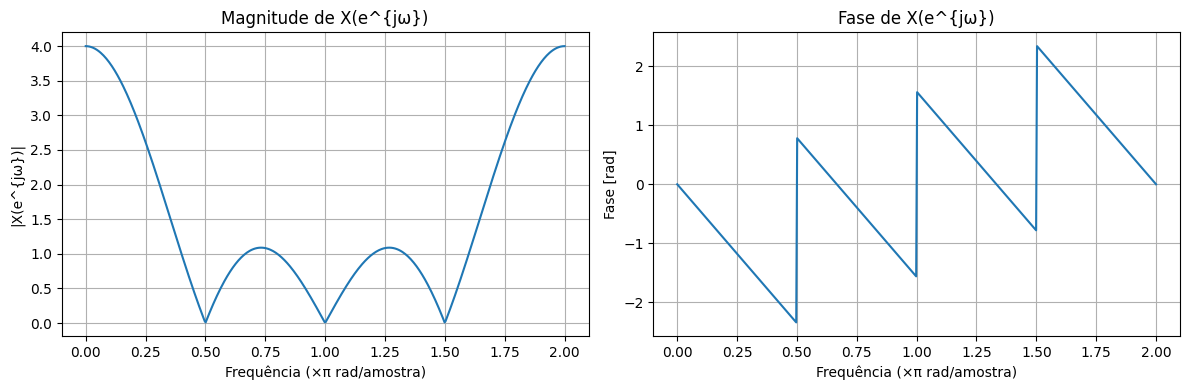

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sinal de entrada
x = np.ones(4)  # x(n) = [1, 1, 1, 1]
N = 512  # resolução da DTFT

# Frequência normalizada (omega)
omega = np.linspace(0, 2*np.pi, N)
X = np.array([np.sum(x * np.exp(-1j * w * np.arange(len(x)))) for w in omega])

# Plotagem
plt.figure(figsize=(12, 4))

# Magnitude
plt.subplot(1, 2, 1)
plt.plot(omega/np.pi, np.abs(X))
plt.title('Magnitude de X(e^{jω})')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('|X(e^{jω})|')
plt.grid(True)

# Fase
plt.subplot(1, 2, 2)
plt.plot(omega/np.pi, np.angle(X))
plt.title('Fase de X(e^{jω})')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Fase [rad]')
plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
# Funções DFT e IDFT (caso não tenha rodado antes)
def dft(xn, N):
    xn = np.asarray(xn)
    n = np.arange(N)
    k = np.arange(N)
    WN = np.exp(-1j * 2 * np.pi / N)
    nk = np.outer(n, k)
    WNnk = WN ** nk
    Xk = np.dot(xn, WNnk)
    return Xk

# Cálculo da DFT
Xk = dft(xn, N)

# Exibindo resultado da DFT
for k, val in enumerate(Xk):
    print(f"X({k}) = {val:.2f}")


X(0) = 4.00+0.00j
X(1) = -0.00-0.00j
X(2) = 0.00-0.00j
X(3) = 0.00-0.00j


##  Zero-padding na Transformada Discreta de Fourier (DFT)

**Zero-padding** é uma técnica em que estendemos artificialmente o comprimento de um sinal, adicionando zeros ao final **antes de aplicar a DFT**.

###  Por que aplicar Zero-padding?
- Aumenta a **resolução da DFT** (mais pontos no espectro);
- Permite uma **visualização mais suave** da DFT (melhor aproximação da DTFT);
- Facilita comparações visuais entre espectros.

---

###  Exemplo: Zero-padding aplicado ao sinal $ x(n) = [1, 1, 1, 1] $

Vamos considerar o mesmo sinal do exemplo anterior:
- **Sem padding (N = 4)**: A DFT fornece 4 amostras igualmente espaçadas no domínio da frequência.
- **Com padding (N = 16)**: A DFT fornece 16 amostras, oferecendo melhor resolução.

>  Importante: **O conteúdo espectral (frequências presentes) não muda**, apenas a representação se torna mais detalhada.

---

###  Visualização

Ao plotar a DFT com padding, usamos o eixo de frequência normalizado em **unidades de π**, isto é, $ \omega = \frac{2\pi k}{N} $, e representamos como frações de $ \pi $.

Na prática:
- O gráfico da DFT sem padding mostra os valores em $ k = 0, 1, 2, 3 $;
- Com zero-padding (ex: $ N = 16 $), o gráfico mostra os valores em $ k = 0, 1, 2, ..., 15 $, correspondendo a frequências normalizadas de $ 0 $ a $ 2\pi $.



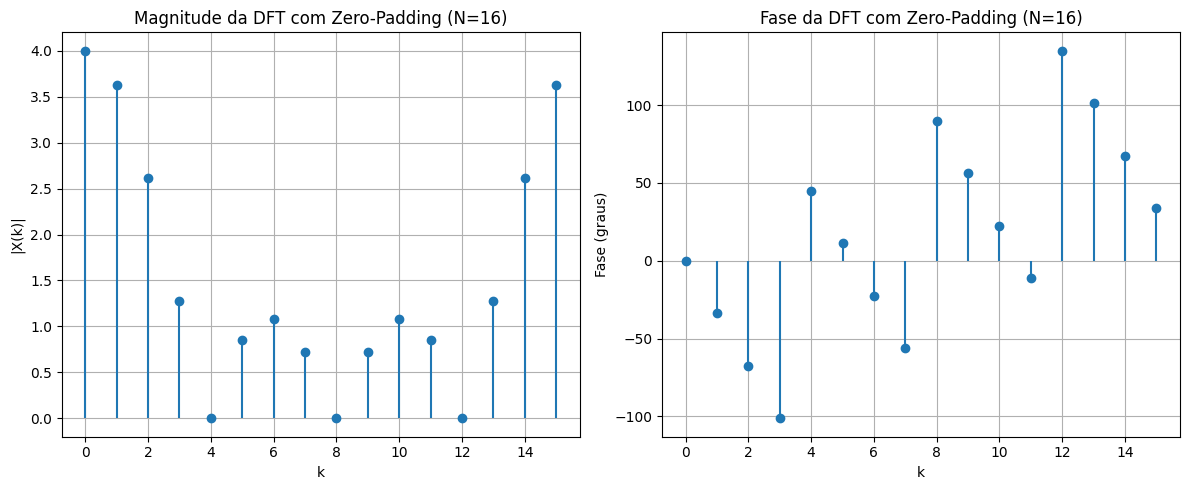

In [19]:
# Sinal original
xn = np.array([1, 1, 1, 1])

# Zero-padding para N = 16
N = 16
xn_padded = np.pad(xn, (0, N - len(xn)), 'constant')
n = np.arange(N)

# Cálculo da DFT com N=16
k = np.arange(N)
WN = np.exp(-1j * 2 * np.pi / N)
nk = np.outer(n, k)
WNnk = WN ** nk
Xk = xn_padded @ WNnk

# Plotagem
plt.figure(figsize=(12, 5))

# Magnitude
plt.subplot(1, 2, 1)
plt.stem(k, np.abs(Xk), basefmt=" ")
plt.title('Magnitude da DFT com Zero-Padding (N=16)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.grid(True)

# Fase (em graus)
plt.subplot(1, 2, 2)
plt.stem(k, np.angle(Xk, deg=True), basefmt=" ")
plt.title('Fase da DFT com Zero-Padding (N=16)')
plt.xlabel('k')
plt.ylabel('Fase (graus)')
plt.grid(True)

plt.tight_layout()
plt.show()


## 5.4 Propriedades da Transformada Discreta de Fourier (DFT)

Neste tópico, discutimos algumas propriedades fundamentais da DFT que facilitam sua compreensão e aplicação prática.

### 1. Linearidade

A DFT é uma transformação linear. Isso significa que, para quaisquer duas sequências $ x_1[n] $ e $ x_2[n] $ e quaisquer constantes escalares $ a $ e $ b $, a DFT satisfaz:

$$
DFT\{a x_1[n] + b x_2[n]\} = a \cdot DFT\{x_1[n]\} + b \cdot DFT\{x_2[n]\}
$$

### 2. Dobramento Circular (Circular Folding)

A operação de dobramento circular de uma sequência no domínio do tempo corresponde a uma operação específica no domínio da frequência. Dobramento circular é definida por:

$$
x[(N - n) \mod N]
$$

onde $ N $ é o comprimento da sequência. A propriedade indica que o DFT da sequência dobrada circularmente é o conjugado complexo do DFT original:

$$
X[k]^* = DFT\{x[(N - n) \mod N]\}
$$

### 3. Conjugação

Seja $ x[n] $ uma sequência discreta, então a conjugação no domínio do tempo está relacionada com a conjugação e inversão da frequência no domínio da DFT:

$$
DFT\{x[n]^*\} = X[(N - k) \mod N]^*
$$

### 4. Propriedades de Simetria para Sequências Reais

Para sequências reais no domínio do tempo, a DFT apresenta propriedades de simetria conjugada:

$$
X[(N - k) \mod N] = X[k]^*
$$

Isso implica que o espectro de uma sequência real é simétrico em módulo e anti-simétrico em fase.




## Exemplo: Propriedades de Simetria da DFT – Questão com Componentes Par e Ímpar Circulares

Considere a sequência $ x(n) = 10 \cdot (0.8)^n $, para $ 0 \leq n \leq 10 $.

### (a) Decomposição da sequência

Dividimos a sequência $ x(n) $ em seus componentes **par circular** $ x_{ec}(n) $ e **ímpar circular** $ x_{oc}(n) $. Esses componentes são definidos da seguinte forma:

- Componente par circular:
  $$
  x_{ec}(n) = \frac{1}{2}(x(n) + x((-n) \mod N))
  $$
- Componente ímpar circular:
  $$
  x_{oc}(n) = \frac{1}{2}(x(n) - x((-n) \mod N))
  $$

### (b) Verificação da propriedade (5.34)

A propriedade (5.34) afirma que:
- A parte real da DFT de $ x(n) $ é igual à DFT da componente par circular $ x_{ec}(n) $
- A parte imaginária da DFT de $ x(n) $ é igual à DFT da componente ímpar circular $ x_{oc}(n) $

Ou seja:
$$
\text{Re}\{DFT[x(n)]\} = DFT[x_{ec}(n)], \quad \text{Im}\{DFT[x(n)]\} = DFT[x_{oc}(n)]
$$

A seguir, implementamos e verificamos essa propriedade usando Python.


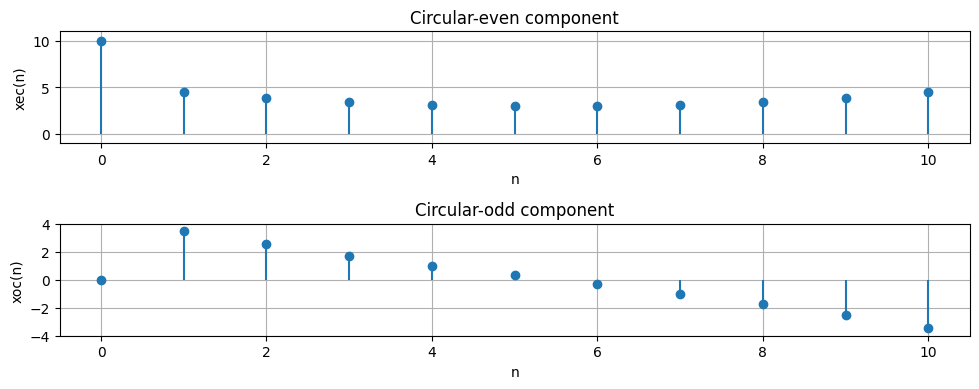

In [21]:
# (a) Definição do sinal x(n)
N = 11
n = np.arange(N)
x = 10 * (0.8) ** n

# Função auxiliar para dobrar índice circularmente
def circular_index(idx, N):
    return idx % N

# Função para calcular componentes par e ímpar circular
def circular_even_odd(x):
    N = len(x)
    xec = np.zeros(N)
    xoc = np.zeros(N)
    for n in range(N):
        x_neg = x[circular_index(-n, N)]
        xec[n] = 0.5 * (x[n] + x_neg)
        xoc[n] = 0.5 * (x[n] - x_neg)
    return xec, xoc

# Cálculo das componentes
xec, xoc = circular_even_odd(x)

# Plotagem das componentes
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.stem(n, xec, basefmt=" ")
plt.title("Circular-even component")
plt.xlabel("n")
plt.ylabel("xec(n)")
plt.axis([-0.5, 10.5, -1, 11])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, xoc, basefmt=" ")
plt.title("Circular-odd component")
plt.xlabel("n")
plt.ylabel("xoc(n)")
plt.axis([-0.5, 10.5, -4, 4])
plt.grid(True)
plt.tight_layout()
plt.show()


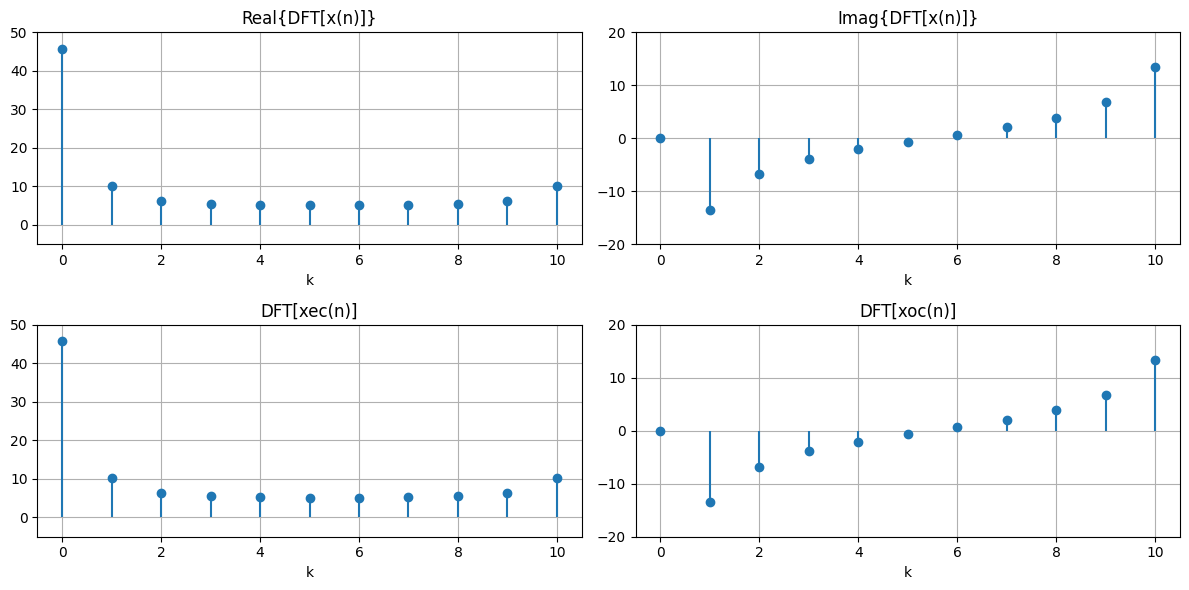

In [23]:
# (b) DFT das sequências
X = np.fft.fft(x, N)
Xec = np.fft.fft(xec, N)
Xoc = np.fft.fft(xoc, N)

# Plotando os espectros
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.stem(n, np.real(X), basefmt=" ")
plt.title("Real{DFT[x(n)]}")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -5, 50])
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, np.imag(X), basefmt=" ")
plt.title("Imag{DFT[x(n)]}")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -20, 20])
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(n, np.real(Xec), basefmt=" ")
plt.title("DFT[xec(n)]")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -5, 50])
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(n, np.imag(Xoc), basefmt=" ")
plt.title("DFT[xoc(n)]")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -20, 20])
plt.grid(True)

plt.tight_layout()
plt.show()


## Propriedades adicionais da DFT (Continuação da seção 5.4)

Dando continuidade ao estudo das propriedades da DFT, apresentamos abaixo mais cinco propriedades fundamentais.

### 5. Deslocamento Circular no Tempo (Circular shift of a sequence)

Seja $x[n]$ uma sequência de comprimento $N$. O deslocamento circular de $x[n]$ por $m$ amostras é definido por:

$$
x_m[n] = x[(n - m) \mod N]
$$

A DFT da sequência deslocada circularmente é:

$$
DFT\{x_m[n]\} = X[k] \cdot e^{-j \frac{2\pi}{N}km}
$$

Ou seja, o deslocamento circular no tempo corresponde a uma **modulação complexa na frequência**.

---

### 6. Deslocamento Circular na Frequência (Circular shift in the frequency domain)

Analogamente, o deslocamento circular na frequência afeta o domínio do tempo:

$$
X_m[k] = X[(k - m) \mod N]
$$

Implica:

$$
DFT^{-1}\{X_m[k]\} = x[n] \cdot e^{j \frac{2\pi}{N}nm}
$$

Ou seja, deslocar a DFT equivale a multiplicar a sequência original por uma exponencial complexa.

---

### 7. Convolução Circular (Circular convolution)

Se $x[n]$ e $h[n]$ são duas sequências de comprimento $N$, sua convolução circular é definida por:

$$
y[n] = (x \circledast h)[n] = \sum_{m=0}^{N-1} x[m] \cdot h[(n - m) \mod N]
$$

A DFT da convolução circular é:

$$
DFT\{x \circledast h\} = X[k] \cdot H[k]
$$

Diferente da convolução linear, a convolução circular **assume periodicidade** de ambas as sequências.

---

### 8. Multiplicação no Tempo (Multiplication)

Seja $y[n] = x[n] \cdot h[n]$. A DFT da multiplicação ponto a ponto no tempo resulta em **convolução circular** no domínio da frequência:

$$
DFT\{x[n] \cdot h[n]\} = X[k] \circledast H[k]
$$

---

### 9. Relação de Parseval (Parseval’s relation)

A relação de Parseval estabelece a conservação de energia entre os domínios do tempo e da frequência:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

Essa relação é útil para análise de energia e potência de sinais discretos, e valida que a DFT é uma transformação unitária (com escala $1/N$).



## Exemplo: Convolução Circular no Domínio do Tempo

Sejam as sequências:

- $x_1(n) = \{1, 2, 2\}$
- $x_2(n) = \{1, 2, 3, 4\}$

Deseja-se calcular a **convolução circular de 4 pontos**:

$$
y(n) = x_1(n) \circledast_4 x_2(n)
$$

A convolução circular de comprimento $N$ é definida como:

$$
y[n] = \sum_{m=0}^{N-1} x_1[m] \cdot x_2[(n - m) \mod N]
$$

A seguir, implementamos essa operação em Python.


In [25]:
import numpy as np

def circular_shift(x, m, N):
    return np.roll(x, m % N)

def circonvt(x1, x2, N):
    if len(x1) > N or len(x2) > N:
        raise ValueError("N must be >= the length of both sequences")


    x1 = np.concatenate([x1, np.zeros(N - len(x1))])
    x2 = np.concatenate([x2, np.zeros(N - len(x2))])

    # Construir matriz de convolução por circular shift de x2(-n)
    m = np.arange(N)
    x2_folded = x2[(-m) % N]  # circular folding
    H = np.zeros((N, N))

    for n in range(N):
        H[n, :] = circular_shift(x2_folded, n, N)

    # y[n] = x1 * H[n]
    y = np.dot(x1, H.T)
    return y


In [26]:

x1 = np.array([1, 2, 2])
x2 = np.array([1, 2, 3, 4])
N = 4

y = circonvt(x1, x2, N)
print("Resultado da convolução circular de 4 pontos:", y)


Resultado da convolução circular de 4 pontos: [15. 12.  9. 14.]


## 5.5 Convolução Linear Usando a DFT

A convolução linear é uma das operações mais importantes em sistemas lineares, especialmente para implementação de filtros FIR. No entanto, a **DFT**, por natureza, realiza **convolução circular**, e não linear — o que pode causar **sobreposição de amostras no tempo**, distorcendo os resultados.

### Problema

Se $x_1(n)$ tem comprimento $N_1$ e $x_2(n)$ tem comprimento $N_2$, então sua **convolução linear** resulta em:

$$
x_3(n) = x_1(n) * x_2(n)
$$

com comprimento:

$$
L = N_1 + N_2 - 1
$$

Por outro lado, se realizamos uma **convolução circular** com comprimento $N = \max(N_1, N_2)$:

$$
x_4(n) = x_1(n) \circledast_N x_2(n)
$$

então $x_4(n)$ terá apenas $N$ amostras e **não será igual** a $x_3(n)$ — ocorre sobreposição indesejada das amostras da sequência original.

---

### Solução

Para evitar essa sobreposição e obter a convolução linear usando DFT:

- Escolha $N = N_1 + N_2 - 1$  
- Faça **zero-padding** de ambas as sequências até que tenham comprimento $N$
- Calcule a convolução circular de comprimento $N$ com DFT/IDFT:

$$
y[n] = IDFT \left\{ DFT\{x_1[n]\} \cdot DFT\{x_2[n]\} \right\}
$$

---

### Conclusão

> Quando usamos zero-padding para estender ambas as sequências a $N = N_1 + N_2 - 1$, a **convolução circular passa a coincidir com a convolução linear**. Isso evita a sobreposição indesejada das amostras no tempo, permitindo calcular a convolução linear de forma eficiente usando a DFT.

---

### Análise do Erro

Para que a convolução circular obtida via DFT coincida exatamente com a convolução linear, é necessário usar um comprimento $N \geq N_1 + N_2 - 1$. Porém, em aplicações práticas, nem sempre é possível usar esse valor, devido a restrições de **memória** ou **desempenho**.

Se escolhermos:

$$
\max(N_1, N_2) \leq N < N_1 + N_2 - 1
$$

então ocorre um **erro sistemático** na convolução circular, que pode ser quantificado.

Seja $x_3(n)$ a convolução linear e $x_4(n)$ a circular, então o erro é:

$$
e(n) = x_4(n) - x_3(n)
$$

Esse erro pode ser expresso como:

$$
e(n) = x_3(n + N), \quad 0 \leq n \leq N - 1
$$

Ou seja, os primeiros valores da convolução circular contêm **componentes deslocadas da convolução linear**, o que afeta a exatidão dos resultados iniciais. Isso ocorre porque as amostras da convolução linear "transbordam" para o início da convolução circular, resultando em sobreposição indesejada.

---

### 5.5.2 Convoluções em Blocos — Método Overlap-Save

Quando a sequência de entrada é **muito longa ou infinita** (como sinais de voz), não é viável realizar a convolução linear diretamente com DFT devido a limitações de memória e **atraso na obtenção dos resultados**.

Para resolver esse problema, usamos **convoluções em blocos**. A ideia é:

- Dividir o sinal de entrada $x(n)$ em blocos de tamanho $N$
- Calcular a convolução circular entre cada bloco e a resposta ao impulso $h(n)$ (com $M < N$)
- Corrigir os erros introduzidos pelos primeiros $(M - 1)$ amostras

#### Método Overlap-Save

1. Divida a sequência $x(n)$ em blocos com **sobreposição de $(M - 1)$ amostras**
2. Em cada bloco:
   - Coloque os primeiros $(M - 1)$ valores como **zeros**
   - Faça a convolução circular entre o bloco e $h(n)$
   - **Descarte** as primeiras $(M - 1)$ amostras do resultado
3. Concatene os resultados válidos de todos os blocos

Esse método garante que as regiões incorretas (devido à sobreposição temporal) sejam eliminadas, e os resultados finais representem a **convolução linear exata** em blocos.

#### Vantagem

Quando $N \gg M$, o método é altamente **eficiente** em termos computacionais, pois permite usar a DFT de forma repetitiva sobre blocos pequenos, com controle de erro.


## Implementação do Método Overlap-Save

A convolução linear de uma sequência longa com a resposta ao impulso de um filtro FIR pode ser realizada de forma eficiente usando o método **Overlap-Save** com a DFT.

A ideia principal é:

- Dividir a sequência de entrada em blocos de comprimento $N$.
- Cada bloco se sobrepõe ao anterior por $M-1$ amostras (onde $M$ é o comprimento da resposta ao impulso).
- Adicionamos $M-1$ zeros ao início da sequência para inicializar o processo.
- Para cada bloco:
  - Realizamos uma convolução circular com $N$ pontos entre o bloco e a resposta ao impulso.
  - Descartamos as primeiras $M-1$ amostras do resultado (por conterem componentes indesejadas da circularidade).
- Os resultados são concatenados para formar a saída final.

Este método é especialmente útil quando $N \gg M$, pois aproveita a eficiência computacional da FFT e mantém o atraso da convolução baixo.

A seguir, implementamos a função `ovrlpsav` em Python para realizar essa operação.


In [1]:
import numpy as np

def circonvt(x, h, N):
    """
    Circular convolution of length-N between x and h
    """
    X = np.fft.fft(x, N)
    H = np.fft.fft(h, N)
    Y = X * H
    return np.fft.ifft(Y).real

def ovrlpsav(x, h, N):
    """
    Overlap-Save method for linear convolution using the DFT
    x: input sequence
    h: impulse response
    N: block length
    """
    Lenx = len(x)
    M = len(h)
    M1 = M - 1
    L = N - M1

    # Zero-padding for h and x
    h = np.concatenate([h, np.zeros(N - M)])
    x = np.concatenate([np.zeros(M1), x, np.zeros(N - 1)])

    # Number of blocks
    K = int(np.floor((Lenx + M1 - 1) / L))
    Y_blocks = []

    for k in range(K + 1):
        xk = x[k * L : k * L + N]
        yk = circonvt(xk, h, N)
        Y_blocks.append(yk[M1:])  # Discard first M-1 samples

    # Concatenate all output blocks
    y = np.concatenate(Y_blocks)
    return y


In [2]:
# Exemplo 5.19: verificação da função ovrlpsav
n = np.arange(10)
x = n + 1
h = np.array([1, 0, -1])
N = 6

y = ovrlpsav(x, h, N)
print("Resultado da convolução (Overlap-Save):")
print(y)


Resultado da convolução (Overlap-Save):
[  1.   2.   2.   2.   2.   2.   2.   2.   2.   2.  -9. -10.]


## 5.6 – The Fast Fourier Transform (FFT)

A Transformada Discreta de Fourier (DFT), dada por:

$$
X(k) = \sum_{n=0}^{N-1} x(n) W_N^{nk}, \quad 0 \leq k \leq N-1
$$

onde $W_N = e^{-j\frac{2\pi}{N}}$, é uma ferramenta poderosa, mas computacionalmente ineficiente quando implementada diretamente. Para calcular todos os $N$ coeficientes da DFT, são necessárias $N^2$ multiplicações complexas — o que torna esse cálculo impraticável para grandes valores de $N$.

Essa complexidade quadrática é denotada por:

$$
C_N = o(N^2)
$$

A revolução ocorreu em 1965 com o trabalho de **Cooley e Tukey**, que introduziram um algoritmo muito mais eficiente, conhecido como **Fast Fourier Transform (FFT)**. A FFT reduz drasticamente o número de multiplicações complexas para:

$$
C_N = N \log_2 N
$$

se $N$ for uma potência de 2, o que representa uma complexidade quase linear — um salto imenso em eficiência.

---

### 🔁 Algoritmo FFT Radix-2 (DIT-FFT)

Assumindo $N = 2^\nu$, podemos dividir a sequência $x(n)$ em duas subsequências de $N/2$ pontos:

- $g_1(n) = x(2n)$ → amostras de ordem par
- $g_2(n) = x(2n+1)$ → amostras de ordem ímpar

Calculando as DFTs $G_1(k)$ e $G_2(k)$ dessas subsequências, podemos reconstruir a DFT total como:

$$
X(k) = G_1(k) + W_N^k G_2(k), \quad 0 \leq k \leq N - 1
$$

Esse processo de dividir e combinar pode ser repetido recursivamente até que cada subsequência tenha apenas um ponto. Essa abordagem é chamada de **Decimação no Tempo (DIT)**.

---

### ⚙️ Implementação FFT no MATLAB

O MATLAB fornece a função `fft(x, N)` para calcular a DFT de $x(n)$ com $N$ pontos:

- Se o vetor $x$ for menor que $N$, ele é preenchido com zeros.
- Se $N$ for omitido, usa-se `length(x)`.
- Se $x$ for uma matriz, a DFT é calculada coluna por coluna.
- Internamente, o MATLAB usa algoritmos de **radix misto** para casos em que $N$ não é potência de 2.
- A inversa é computada via `ifft`.

---

### ⏱️ Experimento: Tempo de Execução do FFT

A seguir, é feita uma medição do tempo de execução da função `fft` para valores de $N$ de 1 até 2048. Embora os resultados dependam do hardware e da versão do MATLAB, a tendência geral ilustra a eficiência da FFT:


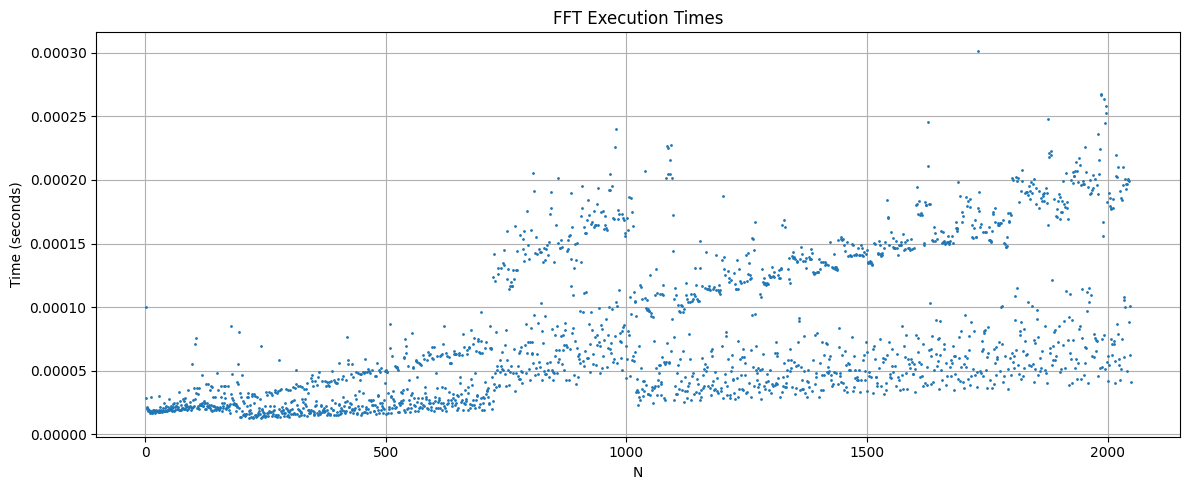

In [5]:
import time

# Faixa de valores de N
Nmax = 2048
fft_time = np.zeros(Nmax)

# Medindo o tempo de execução da FFT para cada N de 1 até 2048
for n in range(1, Nmax + 1):
    x = np.random.rand(n)  # Sinal aleatório de tamanho n
    start = time.time()
    np.fft.fft(x)
    end = time.time()
    fft_time[n - 1] = end - start

# Plotando os resultados
plt.figure(figsize=(12, 5))
plt.plot(range(1, Nmax + 1), fft_time, '.', markersize=2)
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('FFT Execution Times')
plt.grid(True)
plt.tight_layout()
plt.show()

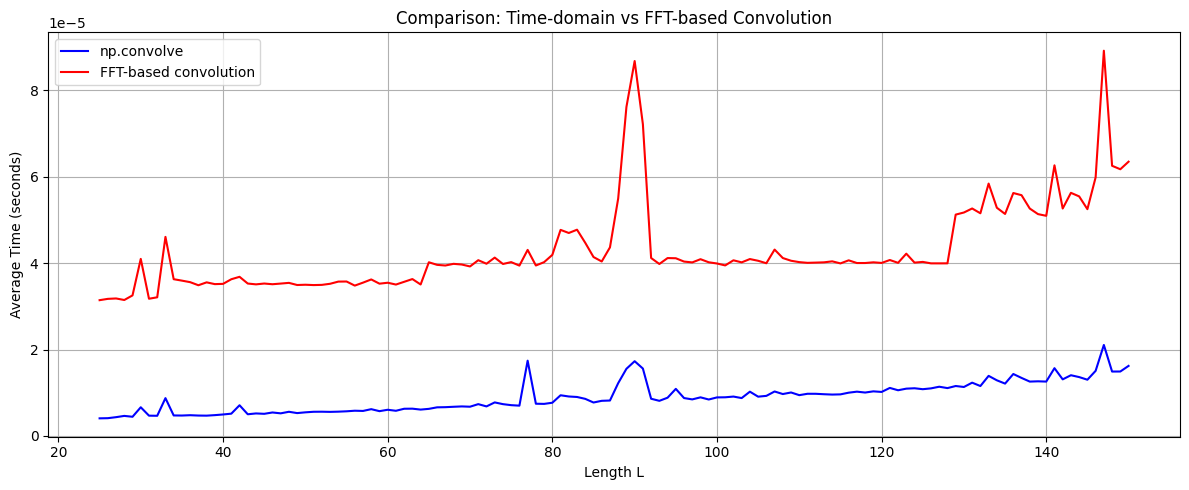

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

conv_time = np.zeros(150)
fft_time = np.zeros(150)

for L in range(1, 151):
    tc = 0
    tf = 0
    N = 2 * L - 1
    nu = int(np.ceil(np.log2(N)))
    N_fft = 2 ** nu

    for _ in range(100):
        h = np.random.randn(L)     # Gaussian N(0,1)
        x = np.random.rand(L)      # Uniform [0,1]

        # Tempo da convolução direta
        t0 = time.time()
        y1 = np.convolve(h, x)
        t1 = time.time()
        tc += (t1 - t0)

        # Tempo da convolução via FFT
        t0 = time.time()
        H = np.fft.fft(h, N_fft)
        X = np.fft.fft(x, N_fft)
        y2 = np.fft.ifft(H * X)
        t1 = time.time()
        tf += (t1 - t0)

    conv_time[L - 1] = tc / 100
    fft_time[L - 1] = tf / 100

# Plotando os tempos médios
n = np.arange(1, 151)
plt.figure(figsize=(12, 5))
plt.plot(n[24:], conv_time[24:], label="np.convolve", color='blue')
plt.plot(n[24:], fft_time[24:], label="FFT-based convolution", color='red')
plt.xlabel("Length L")
plt.ylabel("Average Time (seconds)")
plt.title("Comparison: Time-domain vs FFT-based Convolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
